In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('/Users/willchenwenjun/Desktop/Sample Data.csv')

# Define the selected columns for PCA
selected_columns = [
    'INCOME', 'ASSET', 'DEBT', 'HOUSES', 'MRTHEL', 'FIN', 'ODEBT', 'AGE',
    'PERCENTLIQUIDASSETS', 'PERCENTSTOCKS', 'PERCENTBOND', 
    'PERCENTFINOTHERS', 'PERCENTFIXEDINCOME', 'PERCENTVARIABLEINCOME'
]


# Drop missing values for selected columns
data_for_pca = data[selected_columns]

# Step 1: Replace inf and -inf with NaN
data_for_pca.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values
dropped_rows = data_for_pca[data_for_pca.isna().any(axis=1)]
data_for_pca.dropna(inplace=True)

data_selected = data_for_pca

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA(n_components=8)  # Adjust the number of components as needed
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# View the explained variance for each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by component:", explained_variance)

Explained variance by component: [0.23755221 0.16296069 0.13876155 0.09229718 0.08042043 0.07088004
 0.06555539 0.05877673]


/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_14874/1786034785.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_pca.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_14874/1786034785.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_pca.dropna(inplace=True)


In [49]:
dropped_rows

,INCOME,ASSET,DEBT,HOUSES,MRTHEL,FIN,ODEBT,AGE,PERCENTLIQUIDASSETS,PERCENTSTOCKS,PERCENTBOND,PERCENTFINOTHERS,PERCENTFIXEDINCOME,PERCENTVARIABLEINCOME
383,0.0,7524155.6,11988.6,482300.0,0.0,1562652.0,0.0,56,0.10582,0.0,0.0,0.89418,NaN,NaN


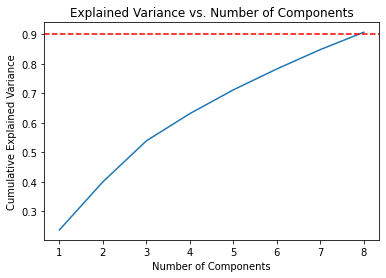

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# After fitting PCA
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.90, color='r', linestyle='--')  # mark 90% threshold
plt.show()


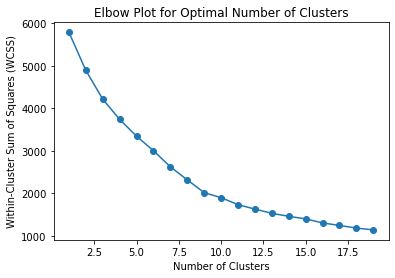

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming pca_components is the output of PCA (transformed data)
wcss = []
for i in range(1, 20):  # Test cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

# Plotting the elbow plot
plt.plot(range(1, 20), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()


In [52]:
# Choose optimal k based on the elbow plot (e.g., k=3) and fit KMeans
optimal_k = 9  # Change this number based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_selected['Cluster'] = kmeans.fit_predict(pca_components)
data_selected['NETWORTH'] = data_selected['ASSET'] - data_selected['DEBT']
# Display the cluster assignments
print(data_selected[['INCOME', 'ASSET', 'NETWORTH', 'AGE', 'Cluster']].head())

          INCOME      ASSET   NETWORTH  AGE  Cluster
0  619630.541086  1723051.2  1371661.2   35        2
1  640483.491986  1033500.0   369993.0   34        2
2  312794.263533   830520.6   543896.6   31        1
3  350031.675856  1366976.0   824044.0   35        8
4  403653.549601  1227522.4  1026334.4   33        1


/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_14874/3790565172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = kmeans.fit_predict(pca_components)
/var/folders/9v/7x5_ljqx225b7sw2wr5snnkh0000gn/T/ipykernel_14874/3790565172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['NETWORTH'] = data_selected['ASSET'] - data_selected['DEBT']


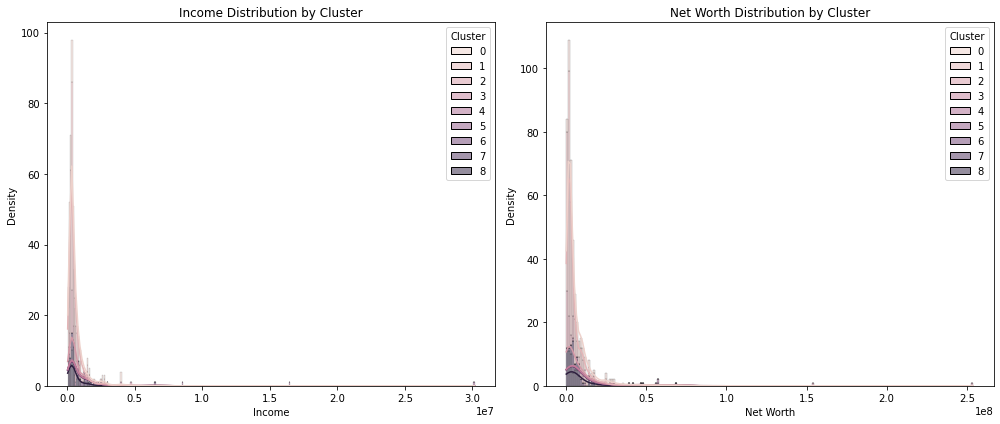

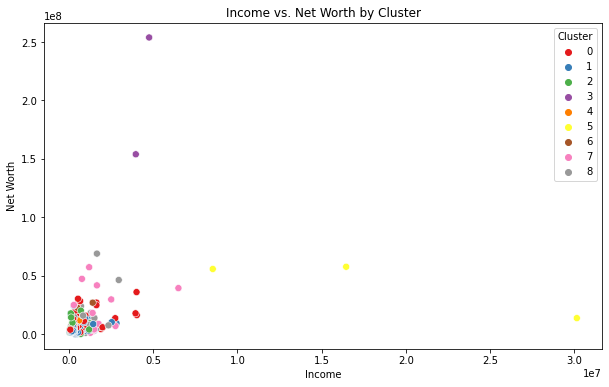

In [53]:
import seaborn as sns

# Plot income and net worth distribution for each cluster
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Income distribution
sns.histplot(data=data_selected, x='INCOME', hue='Cluster', multiple='stack', kde=True, ax=axs[0])
axs[0].set_title("Income Distribution by Cluster")
axs[0].set_xlabel("Income")
axs[0].set_ylabel("Density")

# Net worth distribution
sns.histplot(data=data_selected, x='NETWORTH', hue='Cluster', multiple='stack', kde=True, ax=axs[1])
axs[1].set_title("Net Worth Distribution by Cluster")
axs[1].set_xlabel("Net Worth")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Income vs. Net worth scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_selected, x='INCOME', y='NETWORTH', hue='Cluster', palette='Set1', s=50)
plt.title("Income vs. Net Worth by Cluster")
plt.xlabel("Income")
plt.ylabel("Net Worth")
plt.legend(title='Cluster')
plt.show()

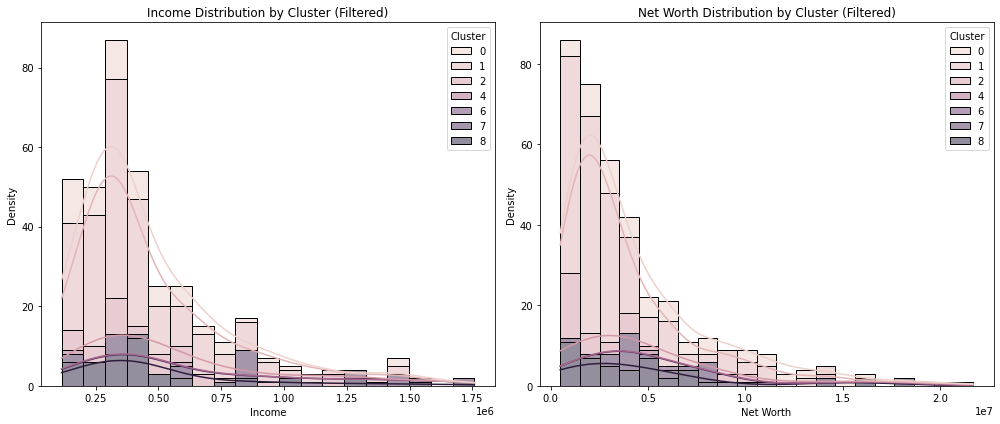

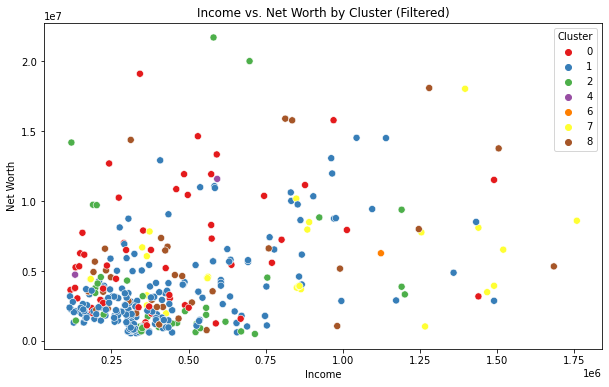

In [54]:
# Define quantile thresholds to filter outliers
income_q_low, income_q_high = data_selected['INCOME'].quantile([0.05, 0.95])
networth_q_low, networth_q_high = data_selected['NETWORTH'].quantile([0.05, 0.95])
# Filter out extreme values based on these quantiles
data_filtered = data_selected[
    (data_selected['INCOME'] >= income_q_low) & 
    (data_selected['INCOME'] <= income_q_high) & 
    (data_selected['NETWORTH'] >= networth_q_low) & 
    (data_selected['NETWORTH'] <= networth_q_high)
]

# Plot filtered income and net worth distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Income distribution
sns.histplot(data=data_filtered, x='INCOME', hue='Cluster', multiple='stack', kde=True, ax=axs[0])
axs[0].set_title("Income Distribution by Cluster (Filtered)")
axs[0].set_xlabel("Income")
axs[0].set_ylabel("Density")

# Net worth distribution
sns.histplot(data=data_filtered, x='NETWORTH', hue='Cluster', multiple='stack', kde=True, ax=axs[1])
axs[1].set_title("Net Worth Distribution by Cluster (Filtered)")
axs[1].set_xlabel("Net Worth")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Income vs. Net worth scatter plot with filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_filtered, x='INCOME', y='NETWORTH', hue='Cluster', palette='Set1', s=50)
plt.title("Income vs. Net Worth by Cluster (Filtered)")
plt.xlabel("Income")
plt.ylabel("Net Worth")
plt.legend(title='Cluster')
plt.show()

In [55]:
data_selected.groupby(['Cluster']).count()

,INCOME,ASSET,DEBT,HOUSES,MRTHEL,FIN,ODEBT,AGE,PERCENTLIQUIDASSETS,PERCENTSTOCKS,PERCENTBOND,PERCENTFINOTHERS,PERCENTFIXEDINCOME,PERCENTVARIABLEINCOME,NETWORTH
Cluster,,,,,,,,,,,,,,,
0,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
1,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
2,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
8,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57


In [56]:
data_selected.groupby(['Cluster']).mean()

,INCOME,ASSET,DEBT,HOUSES,MRTHEL,FIN,ODEBT,AGE,PERCENTLIQUIDASSETS,PERCENTSTOCKS,PERCENTBOND,PERCENTFINOTHERS,PERCENTFIXEDINCOME,PERCENTVARIABLEINCOME,NETWORTH
Cluster,,,,,,,,,,,,,,,
0,7.600500e+05,8.531565e+06,2.568645e+05,1.263467e+06,1.724284e+05,4.391262e+06,4.593333e+03,61.371795,0.137676,0.061940,0.004646,0.795737,0.283414,0.684322,8.274701e+06
1,4.300136e+05,3.571897e+06,2.760478e+05,8.757332e+05,2.112575e+05,2.072951e+06,2.514403e+03,54.956710,0.117621,0.033504,0.000523,0.848351,0.937913,0.056894,3.295849e+06
2,4.505889e+05,4.323903e+06,4.261052e+05,8.291965e+05,3.205048e+05,8.194520e+05,0.000000e+00,50.326087,0.770034,0.050920,0.000000,0.179046,0.742778,0.265466,3.897797e+06
3,4.358267e+06,2.039594e+08,0.000000e+00,2.838680e+06,0.000000e+00,5.623756e+07,0.000000e+00,74.000000,0.050780,0.425387,0.000000,0.523833,0.155388,0.844204,2.039594e+08
4,3.626924e+05,8.168095e+06,8.957000e+03,2.997150e+05,0.000000e+00,7.140796e+06,0.000000e+00,71.500000,0.038417,0.000000,0.651863,0.309720,0.259799,0.739840,8.159138e+06
5,1.838535e+07,4.605634e+07,3.760103e+06,6.407700e+06,3.334760e+06,2.322748e+07,0.000000e+00,45.000000,0.083480,0.043521,0.000000,0.872998,0.012743,0.961143,4.229624e+07
6,1.001438e+06,2.124818e+07,2.696746e+06,6.412293e+06,5.190467e+05,1.077065e+07,1.699533e+06,64.333333,0.309354,0.198933,0.000000,0.491713,0.249026,0.748162,1.855144e+07
7,1.163560e+06,1.348553e+07,1.649340e+06,4.202900e+06,1.335809e+06,4.181487e+06,2.922171e+03,52.441176,0.146663,0.071812,0.000000,0.781525,0.822877,0.172434,1.183619e+07
8,5.461304e+05,7.044748e+06,3.666362e+05,1.153894e+06,2.416939e+05,2.927473e+06,3.916421e+03,60.157895,0.110662,0.575123,0.012576,0.301639,0.702070,0.283599,6.678111e+06


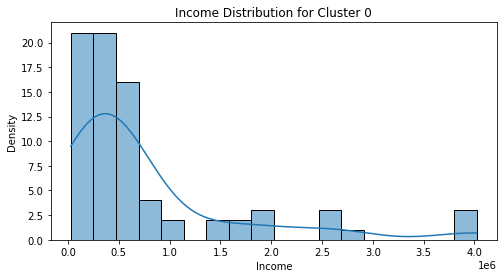

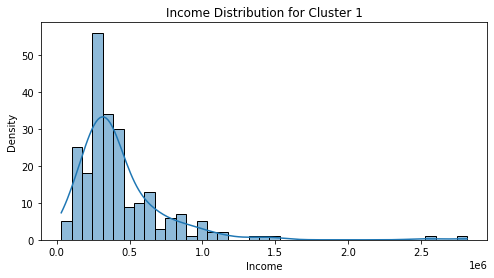

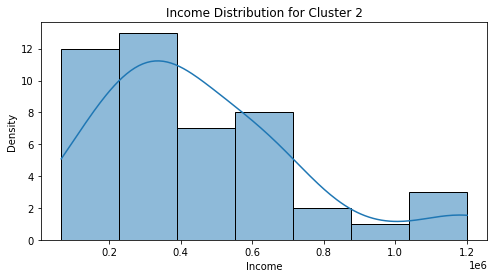

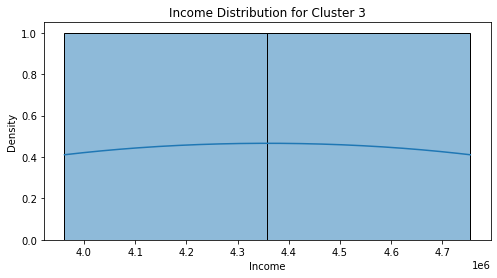

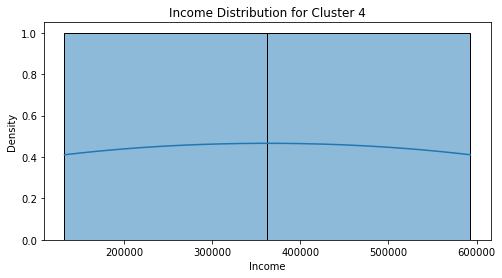

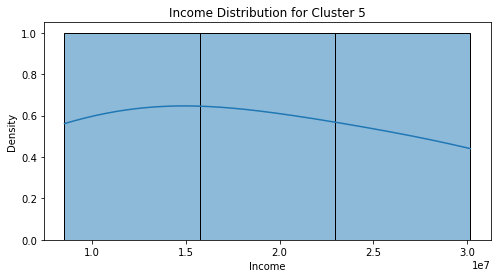

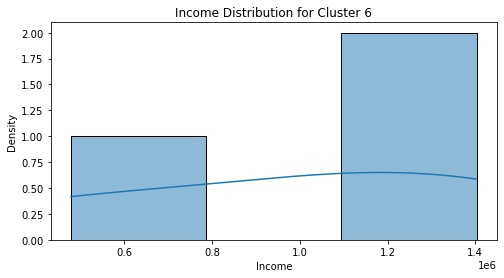

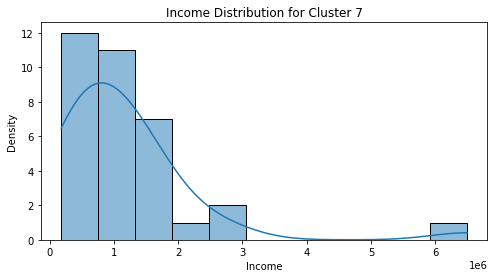

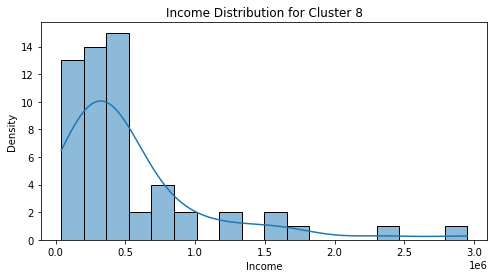

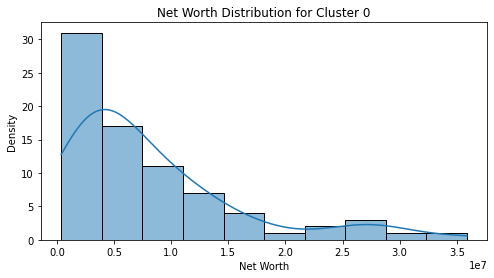

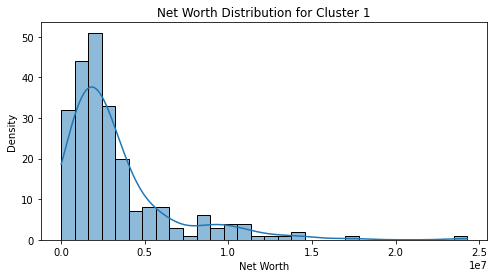

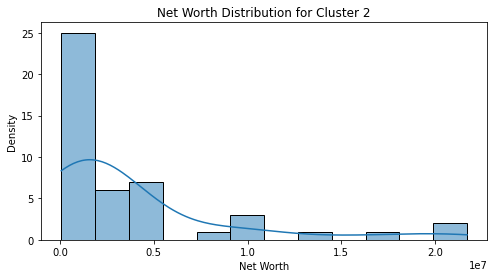

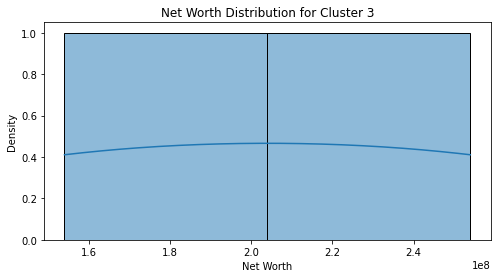

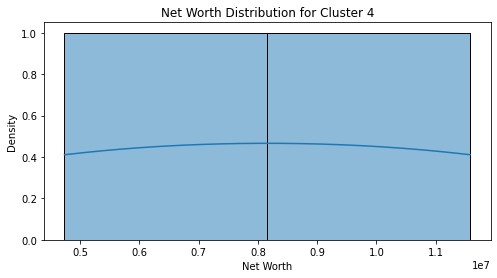

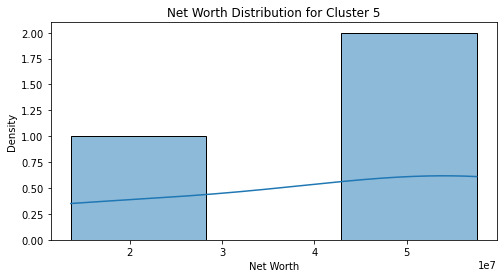

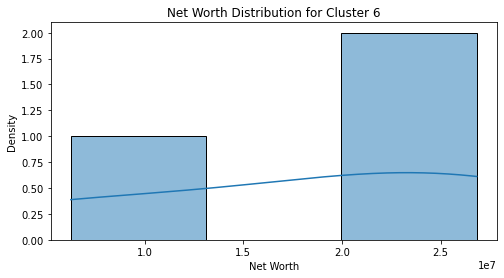

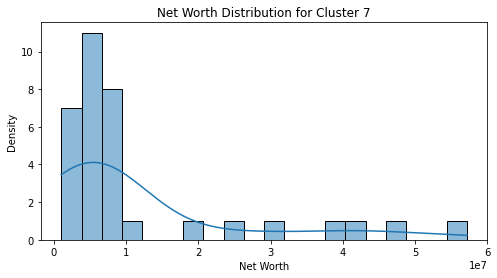

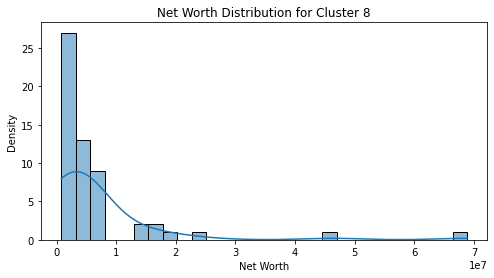

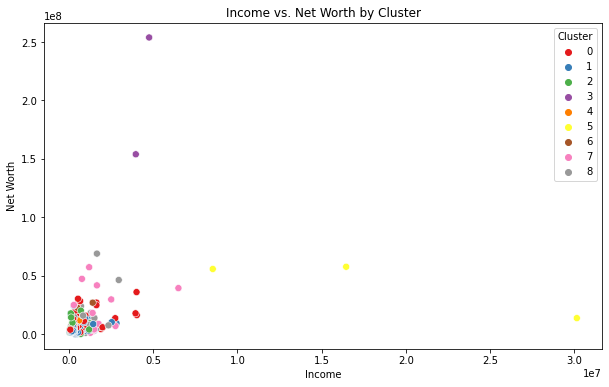

In [57]:
# Visualize income distribution for each cluster in separate plots
for cluster in range(optimal_k):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_selected[data_selected['Cluster'] == cluster], x='INCOME', kde=True)
    plt.title(f"Income Distribution for Cluster {cluster}")
    plt.xlabel("Income")
    plt.ylabel("Density")
    plt.show()

# Visualize net worth distribution for each cluster in separate plots
for cluster in range(optimal_k):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_selected[data_selected['Cluster'] == cluster], x='NETWORTH', kde=True)
    plt.title(f"Net Worth Distribution for Cluster {cluster}")
    plt.xlabel("Net Worth")
    plt.ylabel("Density")
    plt.show()

# Scatter plot to show income vs. net worth with all clusters together
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_selected, x='INCOME', y='NETWORTH', hue='Cluster', palette='Set1', s=50)
plt.title("Income vs. Net Worth by Cluster")
plt.xlabel("Income")
plt.ylabel("Net Worth")
plt.legend(title='Cluster')
plt.show()

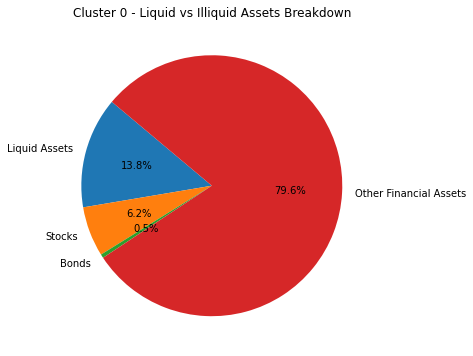

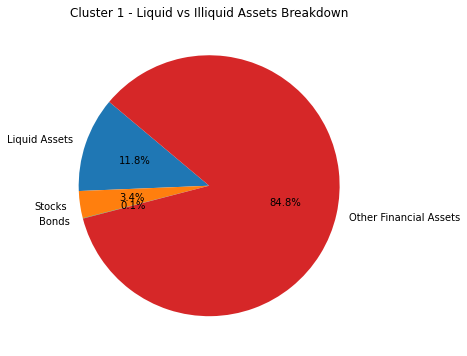

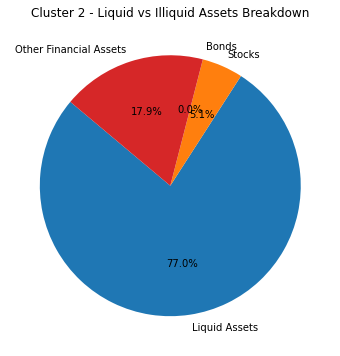

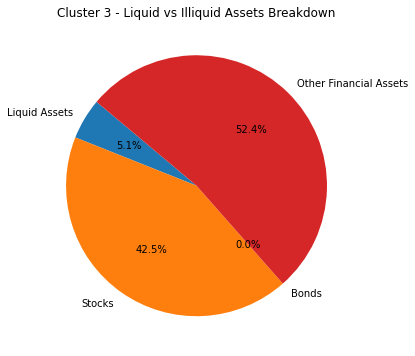

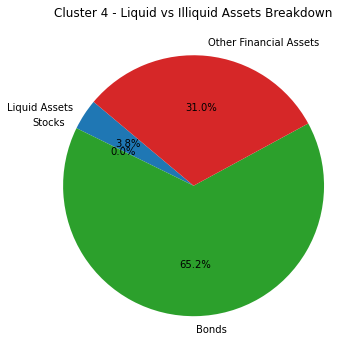

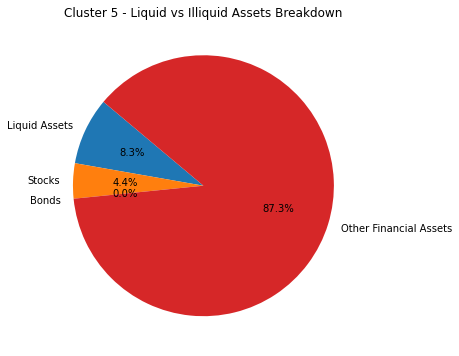

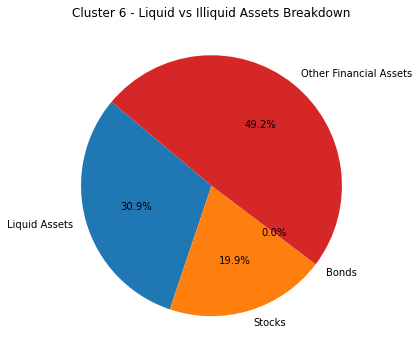

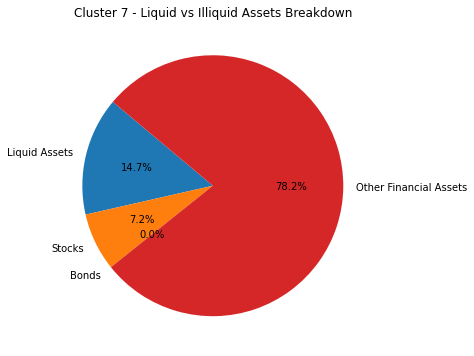

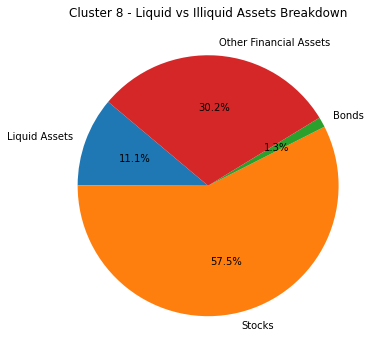

In [58]:
for cluster in range(optimal_k):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    
    # Pie Chart 1: Liquid vs. Illiquid Assets Breakdown
    percent_liquid_assets = cluster_data['PERCENTLIQUIDASSETS'].mean()
    percent_stocks = cluster_data['PERCENTSTOCKS'].mean()
    percent_bond = cluster_data['PERCENTBOND'].mean()
    
    # Calculate remaining percentage for other financial assets in illiquids
    percent_illiquid_assets = 1 - percent_liquid_assets
    percent_finothers = percent_illiquid_assets - (percent_stocks + percent_bond)
    
    labels_assets = ['Liquid Assets', 'Stocks', 'Bonds', 'Other Financial Assets']
    sizes_assets = [percent_liquid_assets, percent_stocks, percent_bond, percent_finothers]
    
    plt.figure(figsize=(6, 6), facecolor="white")  # Set white background
    plt.pie(sizes_assets, labels=labels_assets, autopct='%1.1f%%', startangle=140)
    plt.title(f"Cluster {cluster} - Liquid vs Illiquid Assets Breakdown")
    plt.show()

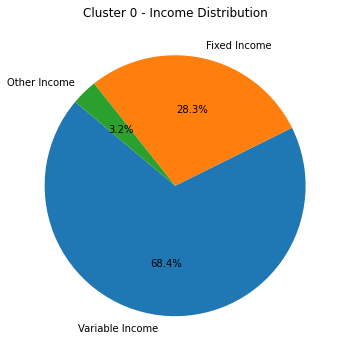

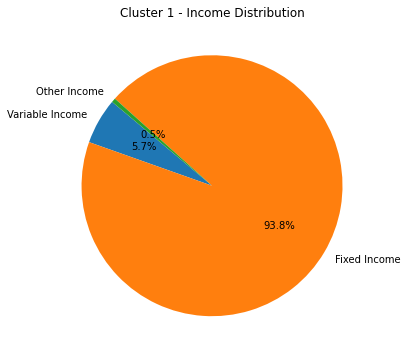

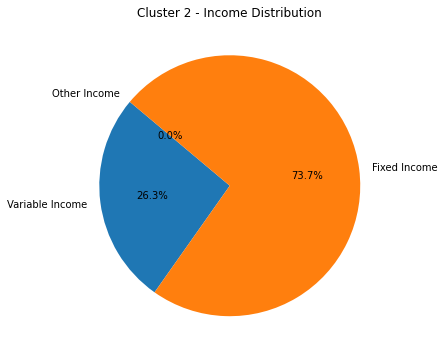

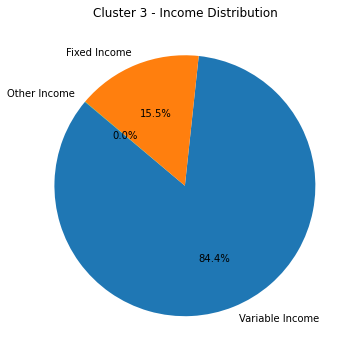

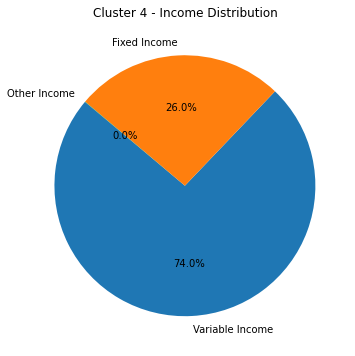

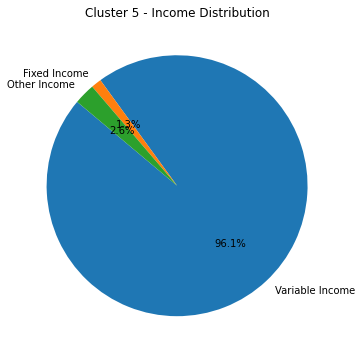

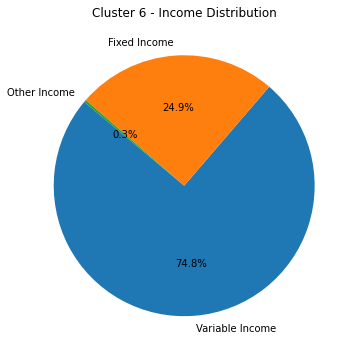

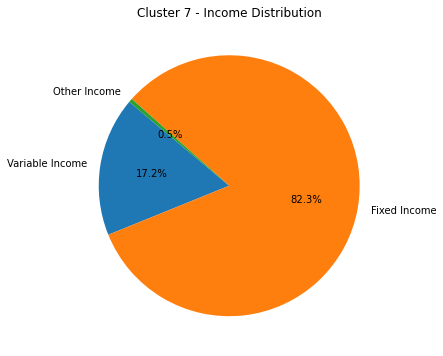

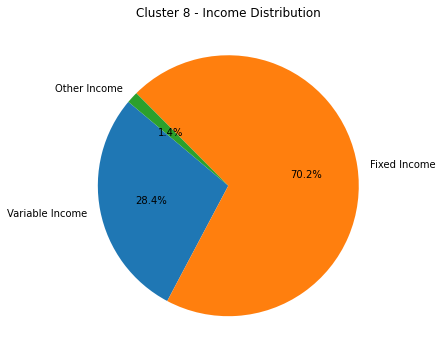

In [67]:
for cluster in range(optimal_k):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]

    # Pie Chart 2: Income Distribution (Variable, Fixed, and Other Income)
    percent_variable_income = cluster_data['PERCENTVARIABLEINCOME'].mean()
    percent_fixed_income = cluster_data['PERCENTFIXEDINCOME'].mean()
    
    # Calculate remaining percentage for other income
    percent_other_income = max(1 - (percent_variable_income + percent_fixed_income),0)
    
    income_labels = ['Variable Income', 'Fixed Income', 'Other Income']
    income_sizes = [percent_variable_income, percent_fixed_income, percent_other_income]
    
    plt.figure(figsize=(6, 6), facecolor="white")  # Set white background
    plt.pie(income_sizes, labels=income_labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Cluster {cluster} - Income Distribution")
    plt.show()

In [68]:
data_selected.to_csv('/Users/willchenwenjun/Desktop/clustered_sample.csv', index=False)